In [1]:
import os
import pandas as pd
import numpy as np
import micromag as mg
import matplotlib.pyplot as plt
import matplotlib.patches

In [2]:
def angular_distance(vec_a, vec_b):
    # Produto escalar entre os vetores
    dot_product = np.dot(vec_a, vec_b)
    
    # Magnitudes dos vetores
    magnitude_a = np.linalg.norm(vec_a)
    magnitude_b = np.linalg.norm(vec_b)
    
    # Cálculo do cosseno do ângulo
    cos_theta = dot_product / (magnitude_a * magnitude_b)
    
    # Ângulo em radianos
    theta = np.rad2deg(np.arccos(cos_theta))
    # theta = np.arccos(np.clip(cos_theta, -1.0, 1.0))# Clipping para evitar erros numéricos
    return theta

In [3]:
# Pasta onde os arquivos CSV estão localizados
csv_folder = "csv_files_45k_grains_per_mm3"
# Listas para armazenar os momentos dipolares
mx_all_standard, my_all_standard, mz_all_standard = [], [], []
mx_all_iterative, my_all_iterative, mz_all_iterative = [], [], []

# Listas para armazenar os valores de R²
r2_all_standard, r2_all_iterative = [], []

# Processar os arquivos da pasta
for file in os.listdir(csv_folder):
    if file.endswith("_standard.csv"):
        # Ler os arquivos padrão
        df_standard = pd.read_csv(os.path.join(csv_folder, file))
        mx_all_standard.extend(df_standard['mx_standard'].values)
        my_all_standard.extend(df_standard['my_standard'].values)
        mz_all_standard.extend(df_standard['mz_standard'].values)
        r2_all_standard.extend(df_standard['r_2_standard'].values)

    elif file.endswith("_iterative.csv"):
        # Ler os arquivos iterativos
        df_iterative = pd.read_csv(os.path.join(csv_folder, file))
        mx_all_iterative.extend(df_iterative['mx_iterative'].values)
        my_all_iterative.extend(df_iterative['my_iterative'].values)
        mz_all_iterative.extend(df_iterative['mz_iterative'].values)
        r2_all_iterative.extend(df_iterative['r_2_iterative'].values)

# Criar as listas com as soluções finais para os momentos dipolares
dipole_moment_standard = np.array([
    np.array(mx_all_standard), 
    np.array(my_all_standard), 
    np.array(mz_all_standard)
]).T

dipole_moment_iterative = np.array([
    np.array(mx_all_iterative), 
    np.array(my_all_iterative), 
    np.array(mz_all_iterative)
]).T

# Criar arrays para os valores de R²
r2_standard = np.array(r2_all_standard)
r2_iterative = np.array(r2_all_iterative)


In [4]:
indices_standard = np.random.permutation(dipole_moment_standard.shape[0])
indices_iterative = np.random.permutation(dipole_moment_iterative.shape[0])

# indices_standard = np.argsort(r2_standard)[::-1]
# indices_iterative = np.argsort(r2_iterative)[::-1]

r2_iterative[indices_iterative]

array([0.99112062, 0.99846833, 0.99925014, ..., 0.90585297, 0.98753588,
       0.99974526])

In [5]:
dipole_moment_standard = dipole_moment_standard[indices_standard]
dipole_moment_iterative = dipole_moment_iterative[indices_iterative]
r2_standard = r2_standard[indices_standard]
r2_iterative = r2_iterative[indices_iterative]

In [6]:
inc_standard, dec_standard = [], []
inc_iterative, dec_iterative = [], []

for n in range(2, len(dipole_moment_standard[:, 0])):
    vector_sum = np.sum(dipole_moment_standard[:n, :], axis=0)
    inc, dec, _ = mg.vector_to_angles(vector_sum)
    inc_standard.append(inc)
    dec_standard.append(dec)

for n in range(2, len(dipole_moment_iterative[:, 0])):
    vector_sum = np.sum(dipole_moment_iterative[:n, :], axis=0)
    inc, dec, _ = mg.vector_to_angles(vector_sum)
    inc_iterative.append(inc)
    dec_iterative.append(dec)

In [7]:
r2 = 0.85
filtered_standard = dipole_moment_standard[r2_standard >= r2]
filtered_iterative = dipole_moment_iterative[r2_iterative >= r2]

inc_standard, dec_standard = [], []
inc_iterative, dec_iterative = [], []
inc_standard_filtered, dec_standard_filtered = [], []
inc_iterative_filtered, dec_iterative_filtered = [], []

vector_sum_standard, vector_sum_iterative = [], []
vector_sum_standard_filtered, vector_sum_iterative_filtered = [], []

for n in range(2, len(dipole_moment_standard[:, 0])):
    vector_sum = np.sum(dipole_moment_standard[:n, :], axis=0)
    vector_sum_standard.append(vector_sum)  # Armazenar vetor somado
    inc, dec, _ = mg.vector_to_angles(vector_sum)
    inc_standard.append(inc)
    dec_standard.append(dec)

for n in range(2, len(dipole_moment_iterative[:, 0])):
    vector_sum = np.sum(dipole_moment_iterative[:n, :], axis=0)
    vector_sum_iterative.append(vector_sum)  # Armazenar vetor somado
    inc, dec, _ = mg.vector_to_angles(vector_sum)
    inc_iterative.append(inc)
    dec_iterative.append(dec)

for n in range(2, len(filtered_standard[:, 0])):
    vector_sum = np.sum(filtered_standard[:n, :], axis=0)
    vector_sum_standard_filtered.append(vector_sum)  # Armazenar vetor somado
    inc, dec, _ = mg.vector_to_angles(vector_sum)
    inc_standard_filtered.append(inc)
    dec_standard_filtered.append(dec)

for n in range(2, len(filtered_iterative[:, 0])):
    vector_sum = np.sum(filtered_iterative[:n, :], axis=0)
    vector_sum_iterative_filtered.append(vector_sum)  # Armazenar vetor somado
    inc, dec, _ = mg.vector_to_angles(vector_sum)
    inc_iterative_filtered.append(inc)
    dec_iterative_filtered.append(dec)


In [8]:
# Defina sua direção de referência (por exemplo, vetor unitário)
reference_vector = mg.angles_to_vector(30, 30, 1)  # exemplo, ajuste conforme necessário
inc_ref, dec_ref = 30, 30

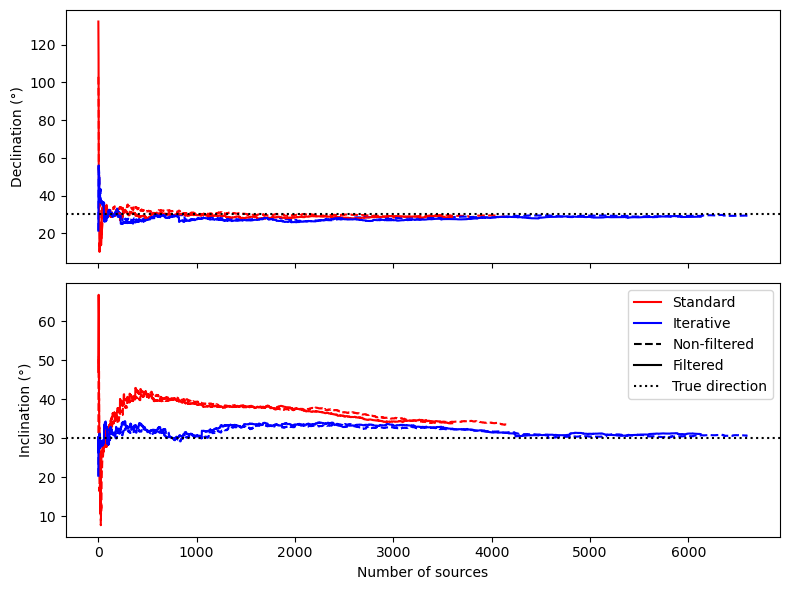

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Panel A
axs[0].plot(range(2, len(dec_standard) + 2), dec_standard, ls='dashed', color='r')
axs[0].plot(range(2, len(dec_iterative) + 2), dec_iterative, ls='dashed', color='b')
# axs[0].set_title("Declinação (Sem Filtro)")
axs[0].set_ylabel("Declination (°)")
axs[0].grid()

# Panel B
axs[1].plot(range(2, len(inc_standard) + 2), inc_standard, ls='dashed', color='r')
axs[1].plot(range(2, len(inc_iterative) + 2), inc_iterative, ls='dashed', color='b')
# axs[1].set_title("Inclinação (Sem Filtro)")
axs[1].set_ylabel("Inclination (°)")
axs[1].grid()

# Panel C
axs[0].plot(range(2, len(dec_standard_filtered) + 2), dec_standard_filtered, color='r')
axs[0].plot(range(2, len(dec_iterative_filtered) + 2), dec_iterative_filtered, c='b')
axs[0].axhline(y=dec_ref, xmin=2/5000, xmax=1, color='k', ls='dotted', label='True direction')
axs[0].grid()

# Panel D
axs[1].plot(range(2, len(inc_standard_filtered) + 2), inc_standard_filtered, c='r')
axs[1].plot(range(2, len(inc_iterative_filtered) + 2), inc_iterative_filtered, c='b')
# axs[1].set_title("Inclinação (Com Filtro)")
axs[1].set_xlabel("Number of sources")


axs[1].plot([],[], c='r', label='Standard')
axs[1].plot([],[], c='b', label='Iterative')
axs[1].plot([],[], c='k', ls='dashed', label='Non-filtered')
axs[1].plot([],[], c='k', label='Filtered')
axs[1].axhline(y=inc_ref, xmin=2/5000, xmax=1, color='k', ls='dotted', label='True direction')
axs[1].legend()
axs[1].grid()

# axs[0].set_ylim(-180, 180)
# axs[1].set_ylim(-40, 70)

plt.tight_layout()
plt.show()


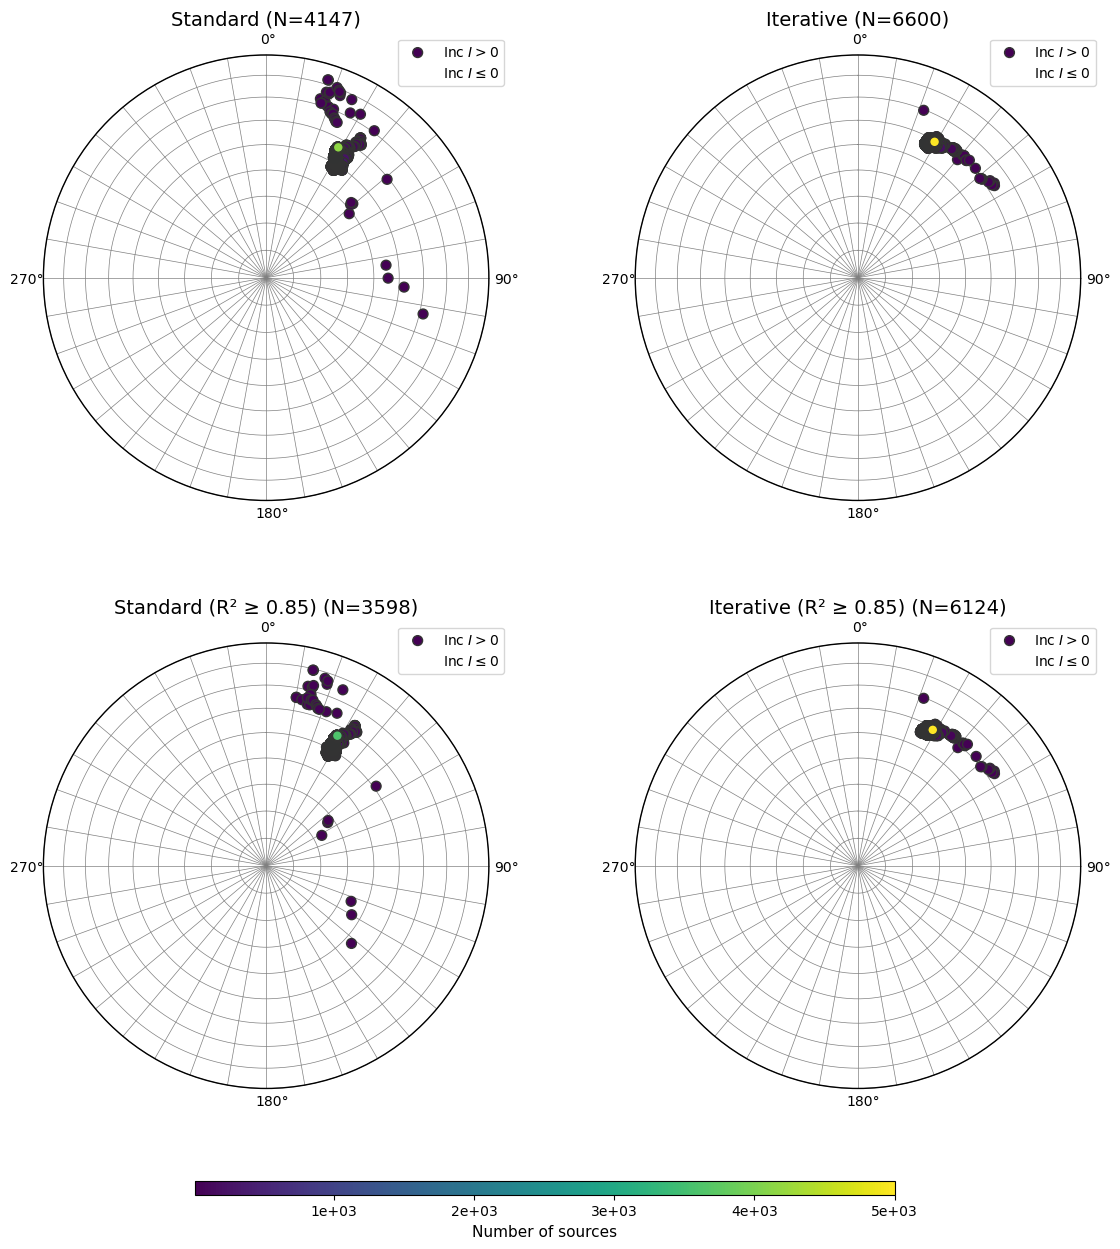

In [10]:
# Configuração inicial
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

titles = [
    "Standard",
    "Iterative",
    "Standard (R² ≥ 0.85)",
    "Iterative (R² ≥ 0.85)"
]

datasets = [
    (inc_standard, dec_standard, vector_sum_standard),
    (inc_iterative, dec_iterative, vector_sum_iterative),
    (inc_standard_filtered, dec_standard_filtered, vector_sum_standard_filtered),
    (inc_iterative_filtered, dec_iterative_filtered, vector_sum_iterative_filtered),
]

cmap = "viridis"  # Escolha um colormap

for ax, (title, (inc, dec, vector_sum)) in zip(axes, zip(titles, datasets)):
    # Calcular novo amplitude
    new_amp = range(2, len(inc) + 2)
    
    # Recalcular o vetor somado com nova amplitude
    new_vector_sum = mg.angles_to_vector(inc, dec, new_amp)
    
    # Criar a projeção estereográfica
    projection = mg.StereographicProjection(new_vector_sum)
    
    # Configurar kwargs para o scatter plot
    kwargs = dict(s=50, cmap=cmap, vmin=2, vmax=5000)
    
    # Plotar a projeção estereográfica
    tmp = projection.plot(ax=ax, draw_cross=False, add_radial_grid=True, label="Inc", add_legend=True, **kwargs)
    
    # Adicionar a quantidade de fontes no título
    num_sources = len(inc)
    ax.set_title(f"{title} (N={num_sources})", fontsize=14)

# Configuração da barra de cores compartilhada
clb = fig.colorbar(
    tmp,
    ax=axes,
    cax=fig.add_axes([0.25, 0.05, 0.5, 0.01]),
    format="%.0g",
    orientation="horizontal",
)
clb.set_label(label="Number of sources", fontsize=11)
clb.ax.tick_params(labelsize=10)

# Ajustar espaçamento e exibir o gráfico
# plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()


In [11]:
np.shape(dipole_moment_iterative)

(6602, 3)

In [12]:
# Pasta onde os arquivos CSV estão localizados
# csv_folder = "csv_files_45k_grains_per_mm3"
# Listas para armazenar os momentos dipolares
mx_all_standard, my_all_standard, mz_all_standard = [], [], []
mx_all_iterative, my_all_iterative, mz_all_iterative = [], [], []

# Listas para armazenar os valores de R²
r2_all_standard, r2_all_iterative = [], []

# Processar os arquivos da pasta
for file in os.listdir(csv_folder):
    if file.endswith("_standard.csv"):
        # Ler os arquivos padrão
        df_standard = pd.read_csv(os.path.join(csv_folder, file))
        mx_all_standard.extend(df_standard['mx_standard'].values)
        my_all_standard.extend(df_standard['my_standard'].values)
        mz_all_standard.extend(df_standard['mz_standard'].values)
        r2_all_standard.extend(df_standard['r_2_standard'].values)

    elif file.endswith("_iterative.csv"):
        # Ler os arquivos iterativos
        df_iterative = pd.read_csv(os.path.join(csv_folder, file))
        mx_all_iterative.extend(df_iterative['mx_iterative'].values)
        my_all_iterative.extend(df_iterative['my_iterative'].values)
        mz_all_iterative.extend(df_iterative['mz_iterative'].values)
        r2_all_iterative.extend(df_iterative['r_2_iterative'].values)

# Criar as listas com as soluções finais para os momentos dipolares
dipole_moment_standard = np.array([
    np.array(mx_all_standard), 
    np.array(my_all_standard), 
    np.array(mz_all_standard)
]).T

dipole_moment_iterative = np.array([
    np.array(mx_all_iterative), 
    np.array(my_all_iterative), 
    np.array(mz_all_iterative)
]).T

# Criar arrays para os valores de R²
r2_standard = np.array(r2_all_standard)
r2_iterative = np.array(r2_all_iterative)


In [13]:
r2 = 0.85#-np.inf
dipole_moment_standard = dipole_moment_standard[r2_standard >= r2]
dipole_moment_iterative = dipole_moment_iterative[r2_iterative >= r2]

r2_standard = r2_standard[r2_standard >= r2]
r2_iterative = r2_iterative[r2_iterative >= r2]

In [14]:
indices_standard = np.argsort(r2_standard[r2_standard >= r2])[::-1]
indices_iterative = np.argsort(r2_iterative[r2_iterative >= r2])[::-1]

# r2_iterative[indices_iterative]

In [15]:
def angule_misfit(inc_1, dec_1, inc_2, dec_2):
    
    vector_1 = mg.angles_to_vector(inc_1, dec_1, 1)
    vector_2 = mg.angles_to_vector(inc_2, dec_2, 1)
    
    # calculating dot product
    dot_product = np.dot(vector_1, vector_2)

    # calculating angles in radians
    cos_theta = dot_product
    theta_rad = np.arccos(cos_theta)

    # converting to degrees
    theta_deg = float(np.degrees(theta_rad))
    
    return(np.round(theta_deg, 2))  

In [16]:
angular_distance_standard = []
angular_distance_iterative = []
vector_sum_standard, vector_sum_iterative = [], []
inc_standard, dec_standard = [], []
inc_iterative, dec_iterative = [], []
# Calculando a distância angular para a metodologia "standard"
for n in range(2, len(dipole_moment_standard[:, 0])):
    vector_sum = np.sum(dipole_moment_standard[:n, :], axis=0)
    inc, dec, _ = mg.vector_to_angles(vector_sum)
    vector_sum_standard.append(vector_sum)
    inc_standard.append(inc)
    dec_standard.append(dec)
    # Calcula a distância angular
    angular_distance_value = angular_distance(reference_vector, vector_sum)
    angular_distance_standard.append(angular_distance_value)

# Calculando a distância angular para a metodologia "iterative"
for n in range(2, len(dipole_moment_iterative[:, 0])):
    vector_sum = np.sum(dipole_moment_iterative[:n, :], axis=0)
    inc, dec, _ = mg.vector_to_angles(vector_sum)
    vector_sum_iterative.append(vector_sum)
    inc_iterative.append(inc)
    dec_iterative.append(dec)

    # Calcula a distância angular
    angular_distance_value = angular_distance(reference_vector, vector_sum)
    angular_distance_iterative.append(angular_distance_value)


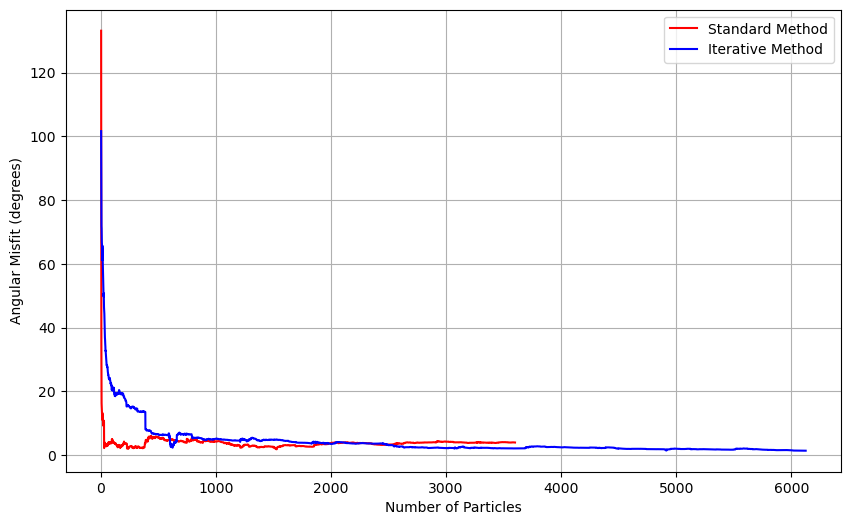

In [17]:
# Número de partículas é equivalente a 'n' nos loops, então você pode usar o range de 'n' para o eixo x
num_particles_standard = list(range(2, len(dipole_moment_standard[:, 0])))
num_particles_iterative = list(range(2, len(dipole_moment_iterative[:, 0])))

# Plotando as distâncias angulares
plt.figure(figsize=(10, 6))

# Plot para a metodologia "standard"
plt.plot(num_particles_standard, angular_distance_standard, label='Standard Method', c='r')

# Plot para a metodologia "iterative"
plt.plot(num_particles_iterative, angular_distance_iterative, label='Iterative Method', c='b')

# Adicionando rótulos e título
plt.xlabel('Number of Particles')
plt.ylabel('Angular Misfit (degrees)')
# plt.title('Angular Distance vs Number of Particles')
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()


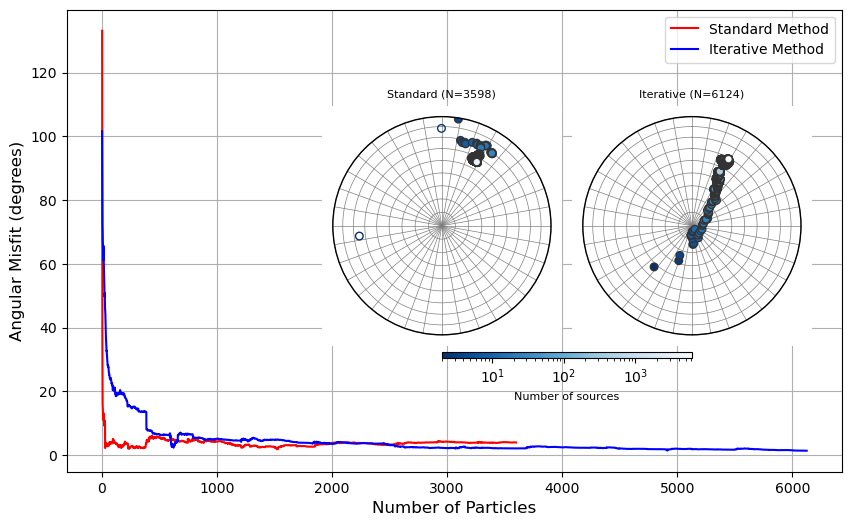

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Número de partículas é equivalente a 'n' nos loops, então você pode usar o range de 'n' para o eixo x
num_particles_standard = list(range(2, len(dipole_moment_standard[:, 0])))
num_particles_iterative = list(range(2, len(dipole_moment_iterative[:, 0])))

# Criar a figura principal
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando as distâncias angulares
ax.plot(num_particles_standard, angular_distance_standard, label='Standard Method', c='r')
ax.plot(num_particles_iterative, angular_distance_iterative, label='Iterative Method', c='b')
ax.set_xlabel('Number of Particles', fontsize=12)
ax.set_ylabel('Angular Misfit (degrees)', fontsize=12)
ax.legend()
ax.grid(True)

# Definindo áreas para as projeções estereográficas dentro do gráfico principal
# Definindo a posição das projeções dentro do gráfico com (x0, y0, width, height)
projection_positions = [
    (0.3, 0.32, 0.4, 0.4),  # Posição do gráfico de projeção padrão
    (0.55, 0.32, 0.4, 0.4)   # Posição do gráfico de projeção iterativo
]

# Títulos e dados para os subgráficos
titles = [
    "Standard",
    "Iterative"
]

datasets = [
    (inc_standard, dec_standard, vector_sum_standard),
    (inc_iterative, dec_iterative, vector_sum_iterative)
]

cmap = "Blues_r"  # Escolha um colormap
maximum = np.max([len(inc_standard), len(inc_iterative)])
cmap_norm = matplotlib.colors.LogNorm #Normalize
# Plotando as projeções estereográficas nas posições definidas
for pos, (title, (inc, dec, vector_sum)) in zip(projection_positions, zip(titles, datasets)):
    # Calcular novo amplitude
    new_amp = range(2, len(inc) + 2)
    
    # Recalcular o vetor somado com nova amplitude
    new_vector_sum = mg.angles_to_vector(inc, dec, new_amp)
    
    # Criar a projeção estereográfica
    projection = mg.StereographicProjection(new_vector_sum)
    
    # Adicionar a área para o gráfico de projeção estereográfica
    inset_ax = fig.add_axes(pos)
    
    # Configurar kwargs para o scatter plot
    kwargs = dict(s=30, cmap=cmap, vmin=2, vmax=maximum, cmap_norm=cmap_norm)
    
    # Plotar a projeção estereográfica no inset
    tmp = projection.plot(ax=inset_ax, add_ticks=False,  **kwargs)
    
    # Adicionar a quantidade de fontes no título
    num_sources = len(inc)
    inset_ax.set_title(f"{title} (N={num_sources})", fontsize=8)

# Configuração da barra de cores compartilhada
clb = fig.colorbar(
    tmp,
    ax=ax,
    cax=fig.add_axes([0.5, 0.3, 0.25, 0.01]),
    # format="%.0g",
    orientation="horizontal",
)
clb.set_label(label="Number of sources", fontsize=8)
clb.ax.tick_params(labelsize=10)

# plt.tight_layout()  # Ajusta o layout automaticamente
plt.show()
